In [1]:
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss
import ipywidgets as wdg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from ipywidgets.embed import embed_minimal_html

[0.33 0.33 0.33]
[0.25 0.5  0.25]
[[0 1 4]
 [1 0 1]
 [4 1 0]]
[[0.19613541 0.13027224 0.00359235]
 [0.04777224 0.23445552 0.04777224]
 [0.00359235 0.13027224 0.19613541]]


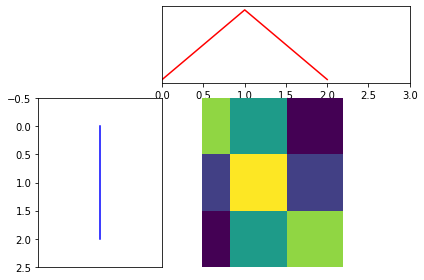

In [3]:
M1 = ot.dist(np.array([0,1,2]).reshape(3,1), np.array([0,1,2]).reshape(3,1))

a = np.array([0.33, 0.33, 0.33])
b = np.array([0.25,0.5,0.25])

gs = ot.sinkhorn(a,b,M1, reg=1)

print(a)
print(b)
print(M1)
print(gs)

ot.plot.plot1D_mat(a,b,gs)
plt.show()

/home/andrew/lib/python3.6/site-packages/ot/bregman.py:371: RuntimeWarning: overflow encountered in true_divide
  u = 1. / np.dot(Kp, v)


<IPython.core.display.Javascript object>


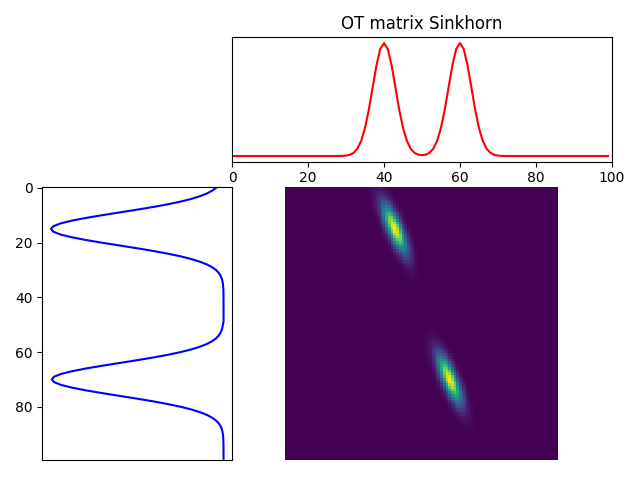

interactive(children=(IntSlider(value=20, description='m', max=80, min=5), IntSlider(value=5, description='s',…

In [4]:
%matplotlib notebook
n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

a = gauss(n, m=20, s=5)  # m= mean, s= std
m = 60
s = 3
b = gauss(n, m=m-20, s=s)+gauss(n, m=m, s=s)
# b = gauss(n, m=60, s=10)

lambd = 2e-3

M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
Gs = ot.sinkhorn(a, b, M, lambd, verbose=False)

# x = np.linspace(0, 2 * np.pi)
fig, ax = plt.subplots()
ot.plot.plot1D_mat(a, b, Gs, 'OT matrix Sinkhorn')

# line, = ax.plot(x, ot.datasets.make_1D_gauss(n,0,5))

def update(m = 20.0, s=5.0, lambd=2e-3):
#     line.set_ydata(ot.datasets.make_1D_gauss(n, w, 5))
    a = np.vstack((gauss(n/2, m=m-5, s=s),gauss(n/2, m=m, s=s))).flatten()
#     a = gauss(n, m, s)
#     a = gauss(n, m=m-20, s=s)+gauss(n, m=m, s=s)
    Gs = ot.sinkhorn(a, b, M, lambd, verbose=False)
    ot.plot.plot1D_mat(a,b,Gs,"OT matrix Sinkhorn")
    fig.canvas.draw_idle()

wdg.interact(update, s=(3,15),lambd=(1,20,0.1), m=(5,80));